making a plot to demonstrate MM kinetics

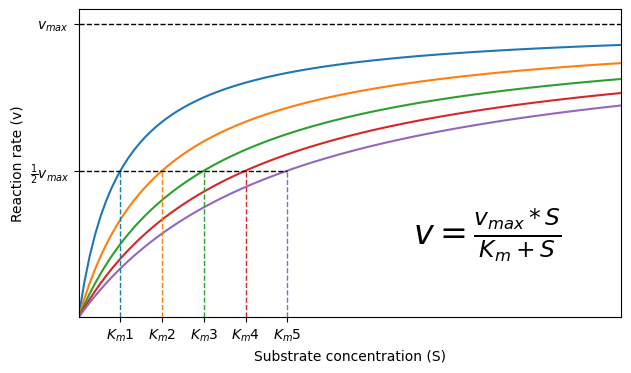

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def MM(v_max, K_m, S):
    return (v_max * S) / (K_m + S)

# Define the range of substrate concentrations
max_val = 13
S = np.linspace(0, max_val, 100)

# Set the values of Vmax and Km
Vmax = 2
Km_values = [1, 2, 3, 4, 5]

reaction_rates = pd.DataFrame({'S': S, 
                                'Km1': MM(Vmax, 1, S),
                                'Km2': MM(Vmax, 2, S), 
                                'Km3': MM(Vmax, 3, S),
                                'Km4': MM(Vmax, 4, S),
                                'Km5': MM(Vmax, 5, S), })

plot_df = reaction_rates.melt('S', var_name='Km', value_name='rate')

# Create a color palette
palette = sns.color_palette("tab10", len(Km_values))

plt.figure(figsize=(7, 4))

sns.lineplot(data=plot_df, x='S', y='rate', hue="Km", palette=palette, legend=False)
plt.axhline(y=Vmax, color='black', linestyle='--', linewidth=1.0)
plt.plot([0, max(Km_values)], [Vmax/2, Vmax/2], color='black', linestyle='--', linewidth=1.0)

plt.text(8, 0.5, r'$v = \frac{v_{max}*S}{K_m+S}$', fontsize=24)

# Add vertical stipled lines for each Km value to the 1/2 vmax line
for i, Km in enumerate(Km_values):
    plt.plot([Km, Km], [0, Vmax/2], color=palette[i], linestyle='--', linewidth=1.0)

plt.xticks([])
plt.yticks([Vmax, Vmax/2], ['$v_{max}$', r'$\frac{1}{2}v_{max}$'])
plt.xticks(Km_values, ['$K_{m}$'+str(x) for x in Km_values])
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (v)')
#plt.legend(title=None,)
plt.xlim(left=0, right=max_val)
plt.ylim(bottom=0)
plt.savefig('MM_plot.svg', format='svg')

['$K_{m}$1', '$K_{m}$2', '$K_{m}$3', '$K_{m}$4', '$K_{m}$5']